# Data Analysis and Visualizations for Energy Consumption
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1zqhjfFamcaAe-q3YUIMf1948tJtN4xup#scrollTo=kCE_C2OdhD1q)  
*BUS5PR1 - Sprint 01*  
by Duc Dao

## Step 3: Predictive Modeling (predictive analytics)

### **3.1 Pre-processing**

**Prepare data for modeling**

In [ ]:
# Regression data, remove unused variables
df_reg = df[df.columns.difference(['Timestamp', 'Date','MeterKey', 'WeekOfMonth',	'WeekOfYear',	'Month',	'Quarter', 'Hour24', 'Hour12ShortString','Minute', 'HalfHour','FullTimeString24'])]
#df_reg = df[df.columns.difference(['Timestamp', 'Date','MeterKey', 'WeekOfMonth', 'Hour12ShortString','Minute', 'HalfHour','FullTimeString24'])]
df_reg.head(1)

,AmPmCode,ApparentTemperature,BuildingType,CDD,Day,HDD,IsHoliday,IsWeekend,MeterReading,RelativeHumidity,Weekday
0,AM,16.0,Accommodation,0.697895,1,0.893684,1,0,4.672,86.0,2


In [ ]:
# check datatypes
df_reg.dtypes

AmPmCode                object
ApparentTemperature    float64
BuildingType            object
CDD                    float64
Day                      int64
HDD                    float64
IsHoliday                int64
IsWeekend                int64
MeterReading           float64
RelativeHumidity       float64
Weekday                  int64
dtype: object

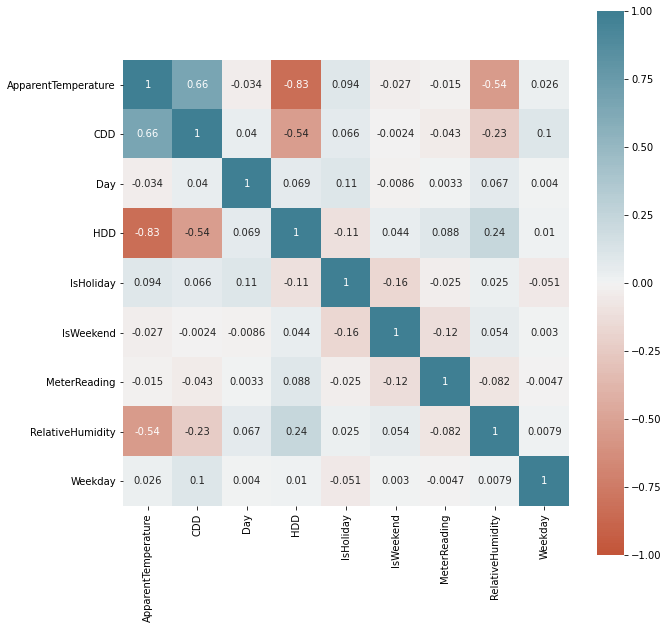

In [ ]:
# Correlation plot
plt.figure(figsize=(10, 10))
corr = df_reg.corr()
sns.heatmap(corr, annot = True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

**Handling categorical variable**

In [ ]:
# handling categorical variable
df_reg['AmPmCode'].unique()

array(['AM', 'PM'], dtype=object)

In [ ]:
df_reg = df[df.columns.difference(['Timestamp','Date','MeterKey', 'WeekOfMonth',	'WeekOfYear',	'Month',	'Quarter', 'Hour24', 'Hour12ShortString','Minute', 'HalfHour','FullTimeString24'])]

In [ ]:
# convert categorical variables (BuildingType, AMPmCode) to numeric
#df_reg = df[df.columns.difference(['Timestamp', 'BuildingType', 'Date','MeterKey', 'WeekOfMonth',	'WeekOfYear',	'Month',	'Quarter', 'Hour24', 'Hour12ShortString','Minute', 'HalfHour','FullTimeString24'])]
df_reg['BuildingType'] = df_reg['BuildingType'].astype('category')
df_reg['AmPmCode'] = df_reg['AmPmCode'].astype('category')
cat_columns = df_reg.select_dtypes(['category']).columns
df_reg[cat_columns] = df_reg[cat_columns].apply(lambda x: x.cat.codes)

df_reg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,AmPmCode,ApparentTemperature,BuildingType,CDD,Day,HDD,IsHoliday,IsWeekend,MeterReading,RelativeHumidity,Weekday
0,0,16.0,0,0.697895,1,0.893684,1,0,4.672,86.0,2
1,0,16.0,0,0.697895,1,0.893684,1,0,5.281,87.0,2
2,0,16.2,0,0.697895,1,0.893684,1,0,4.609,87.0,2
3,0,16.7,0,0.697895,1,0.893684,1,0,4.984,87.0,2
4,0,16.4,0,0.697895,1,0.893684,1,0,5.078,87.0,2
...,...,...,...,...,...,...,...,...,...,...,...
104968,1,17.6,2,1.432292,31,0.692708,0,0,9.000,69.0,2
104969,1,17.3,2,1.432292,31,0.692708,0,0,9.000,70.0,2
104970,1,16.9,2,1.432292,31,0.692708,0,0,8.938,70.0,2
104971,1,16.5,2,1.432292,31,0.692708,0,0,8.750,68.0,2


### 3.2 Regression models

### **Linear regression model 1**
**Load and Split data**

In [ ]:
# split the dataset into predictors (df_x) and target variable (df_y)
df_x = df_reg[df_reg.columns.difference(['MeterReading'])]
df_y = df_reg[['MeterReading']]

**No missing value** on both predictors and target variable *(checked from previous part)*

In [ ]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104973 entries, 0 to 104972
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AmPmCode             104973 non-null  int8   
 1   ApparentTemperature  104973 non-null  float64
 2   BuildingType         104973 non-null  int8   
 3   CDD                  104973 non-null  float64
 4   Day                  104973 non-null  int64  
 5   HDD                  104973 non-null  float64
 6   IsHoliday            104973 non-null  int64  
 7   IsWeekend            104973 non-null  int64  
 8   RelativeHumidity     104973 non-null  float64
 9   Weekday              104973 non-null  int64  
dtypes: float64(4), int64(4), int8(2)
memory usage: 6.6 MB


In [ ]:
# split dataset
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size = 0.33, random_state = 5)

**Perform liner regression**

In [ ]:
# Setup the machine learning model
reg = linear_model.LinearRegression()

# Fit the machine learning model
reg.fit(X_train,Y_train)

# Predict from the machine leanring model
Y_predict = reg.predict(X_test)

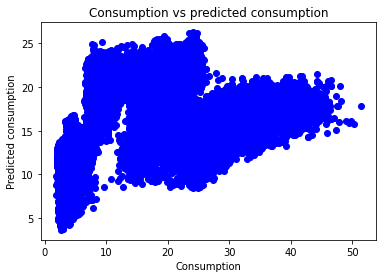

In [ ]:
plt.scatter(Y_test, Y_predict, color='blue')
plt.xlabel("Consumption")
plt.ylabel("Predicted consumption")
plt.title("Consumption vs predicted consumption")
plt.show()

In [ ]:
# Calculate 
error = np.sqrt(np.mean((Y_predict - Y_test)**2))
print('Root Mean Squared Error: ' + str(error))

Root Mean Squared Error: MeterReading    10.181046
dtype: float64


In [ ]:
error_1 = np.sqrt(mean_squared_error(Y_test, Y_predict))
print('Root Mean Squared Error: ' + str(error_1))

Root Mean Squared Error: 10.181046376080742


### **Regression model 2**

Apply standardization because of different scales between variables

**Box plot analysis**

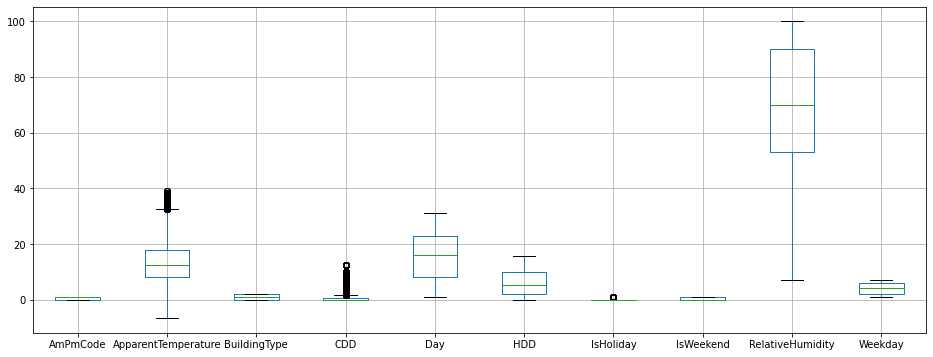

In [ ]:
# Box plot analysis
df_x.boxplot(figsize=(16,6))

The variables are in different scale. Thus, standardization is required.

**Data Standardization**

In [ ]:
# Use standard scaling from sklearn library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
df_x_scaled = scaler.transform(df_x)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=df_x.columns)

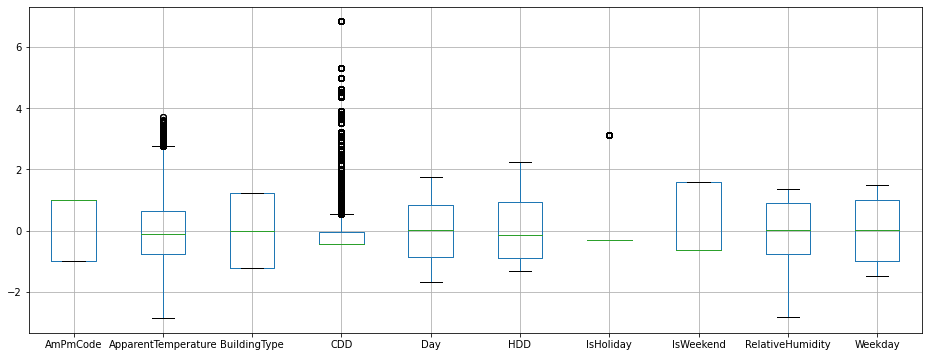

In [ ]:
# Show boxplot for scaled predictors
df_x_scaled.boxplot(figsize=(16,6))

**Regression Modeling**

In [ ]:
# Run the predictive model to see whether accuracy has improved.
X_train, X_test, Y_train, Y_test = train_test_split(df_x_scaled, df_y, test_size = 0.33, random_state = 5)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)
Y_predict = reg.predict(X_test)

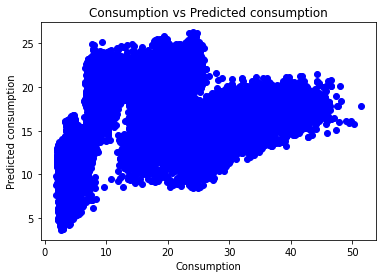

In [ ]:
plt.scatter(Y_test, Y_predict, color='blue')
plt.xlabel("Consumption")
plt.ylabel("Predicted consumption")
plt.title("Consumption vs Predicted consumption")
plt.show()

In [ ]:
error_2 = np.sqrt(mean_squared_error(Y_test, Y_predict))
print('Root Mean Squared Error: ' + str(error_2))

Root Mean Squared Error: 10.181046376080744


In [ ]:
print('Attempt 1 (original data) RMSE:' + str(error_1))
print('Attempt 2 (with scaling) RMSE:' + str(error_2))

Attempt 1 (original data) RMSE:10.181046376080742
Attempt 2 (with scaling) RMSE:10.181046376080744


 
We do not see any difference in scaling in this case.

**Correlation Analaysis**

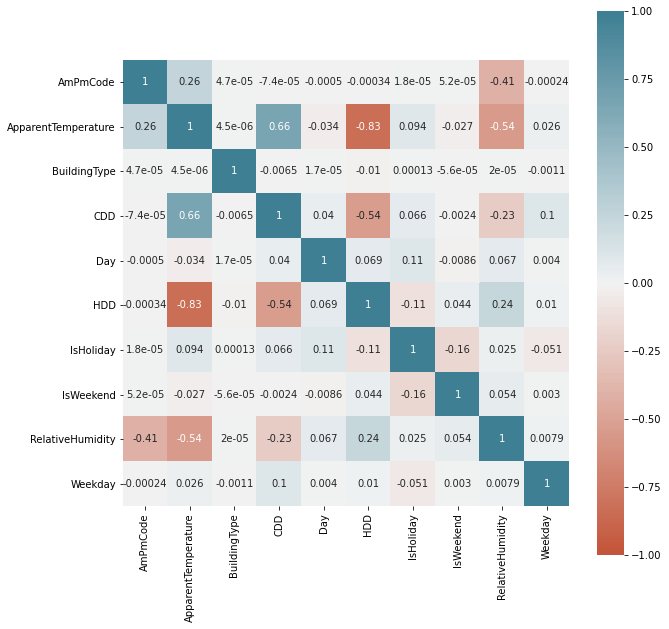

In [ ]:
# Correlation plot
plt.figure(figsize=(10, 10))
corr = df_x_scaled.corr()
sns.heatmap(corr, annot = True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

### **Neural Networks model 3**

Model an advanced predictive model using standard neural network.

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(60), max_iter=1000)

In [ ]:
mlp.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=60, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
Y_predict = mlp.predict(X_test)

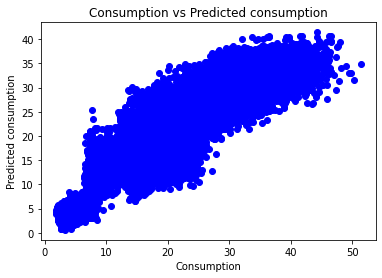

In [ ]:
# Plot the predicted values
plt.scatter(Y_test, Y_predict, color='blue')
plt.xlabel("Consumption")
plt.ylabel("Predicted consumption")
plt.title("Consumption vs Predicted consumption")
plt.show()

In [ ]:
error_3 = np.sqrt(mean_squared_error(Y_test, Y_predict))
print('Root Mean Squared Error: ' + str(error_3))

Root Mean Squared Error: 3.597177878972768


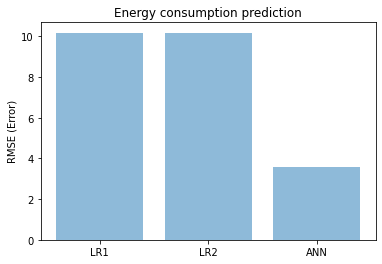

In [ ]:
models = ['LR1', 'LR2', 'ANN']
y_pos = np.arange(len(models))
performance = [error_1, error_2, error_3]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('RMSE (Error)')
plt.title('Energy consumption prediction')
 
plt.show()

### **3.3 Model improvement**
Data pre-process and feature engineering

**Load and Split data**

In [ ]:
# split the dataset into predictors (df_x) and target variable (df_y)
#df_x = df_reg[df_reg.columns.difference(['MeterReading', 'CDD','HDD', 'RelativeHumidity'])]
df_x = df_reg[df_reg.columns.difference(['MeterReading'])]
df_y = df_reg[['MeterReading']]

In [ ]:
# split dataset in different way, 60/40 
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size = 0.20, random_state = 5)

**Data Standardization**

In [ ]:
# Use standard scaling from sklearn library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
df_x_scaled = scaler.transform(df_x)
df_x_scaled = pd.DataFrame(df_x_scaled, columns=df_x.columns)

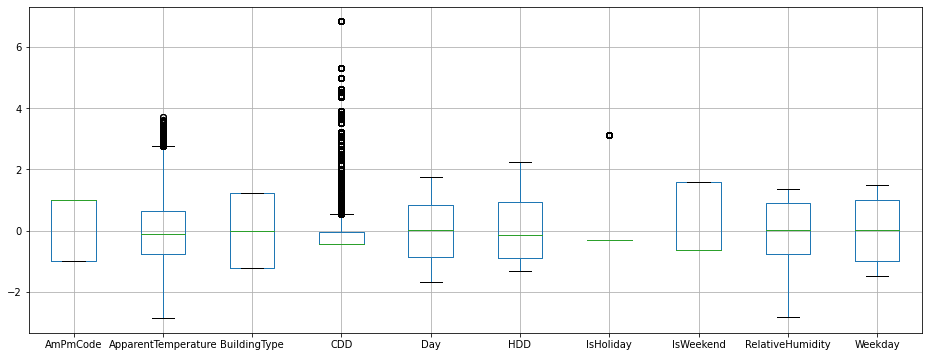

In [ ]:
# Show boxplot for scaled predictors
df_x_scaled.boxplot(figsize=(16,6))

**Feature Engineering**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30538c1350>,
      dtype=object)

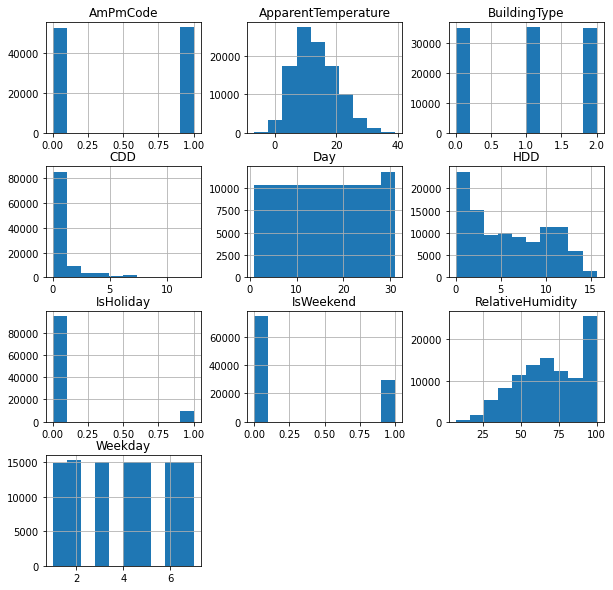

In [ ]:
# Visualize the data discribtion using pandas dataframe:
df_x.hist(figsize=(10, 10))

In [ ]:
# Calculate skewness for all the continous variables.
cts_vars = df_x.dtypes[df_x.dtypes != 'object'].index

# Calculate the skewness and then sort
skew_vars = df_x[cts_vars].skew().sort_values(ascending=False)
print(skew_vars)

CDD                    3.000478
IsHoliday              2.797806
IsWeekend              0.956531
ApparentTemperature    0.491468
HDD                    0.252568
Day                    0.005607
Weekday                0.005048
BuildingType           0.000420
AmPmCode              -0.000705
RelativeHumidity      -0.246461
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


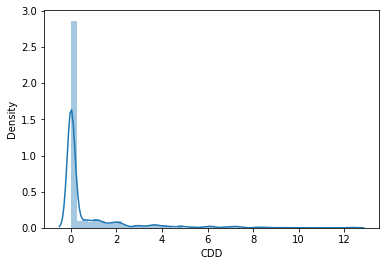

In [ ]:
# address skewd variables by transformation
sns.distplot(df_x['CDD'])

In [ ]:
CDD_var = df_x['CDD']

**Square root transformation**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


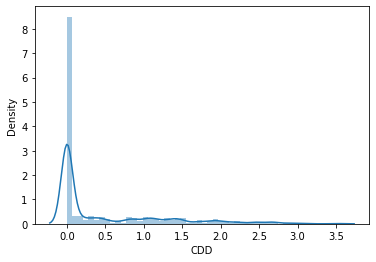

In [ ]:
sqrt_CDD = CDD_var ** (1/2)
sns.distplot(sqrt_CDD)

In [ ]:
# create a new varaiable for sqrt_CDD
df_x['sqrt_CDD'] = sqrt_CDD

# delete original variable
del df_x['CDD']
df_x.keys()

Index(['AmPmCode', 'ApparentTemperature', 'BuildingType', 'Day', 'HDD',
       'IsHoliday', 'IsWeekend', 'RelativeHumidity', 'Weekday', 'sqrt_CDD'],
      dtype='object')

### **Regression model 4**

In [ ]:
# Setup the machine learning model
reg = linear_model.LinearRegression()

# Fit the machine learning model
reg.fit(X_train,Y_train)

# Predict from the machine leanring model
Y_predict = reg.predict(X_test)

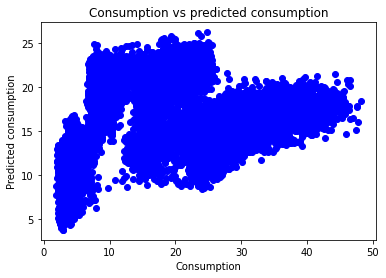

In [ ]:
plt.scatter(Y_test, Y_predict, color='blue')
plt.xlabel("Consumption")
plt.ylabel("Predicted consumption")
plt.title("Consumption vs predicted consumption")
plt.show()

In [ ]:
# Calculate 
error4 = np.sqrt(np.mean((Y_predict - Y_test)**2))
print('Root Mean Squared Error: ' + str(error))

Root Mean Squared Error: MeterReading    10.181046
dtype: float64


In [ ]:
error_4 = np.sqrt(mean_squared_error(Y_test, Y_predict))
print('Root Mean Squared Error: ' + str(error_1))

Root Mean Squared Error: 10.181046376080742


### **Neural Networks model 5**

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(60), max_iter=1000)

In [ ]:
mlp.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=60, learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
Y_predict = mlp.predict(X_test)

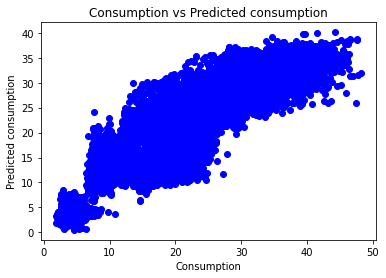

In [ ]:
# Plot the predicted values
plt.scatter(Y_test, Y_predict, color='blue')
plt.xlabel("Consumption")
plt.ylabel("Predicted consumption")
plt.title("Consumption vs Predicted consumption")
plt.show()

In [ ]:
error_5 = np.sqrt(mean_squared_error(Y_test, Y_predict))
print('Root Mean Squared Error: ' + str(error_5))

Root Mean Squared Error: 3.728254699718431


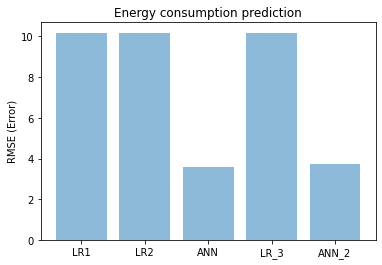

In [ ]:
models = ['LR1', 'LR2', 'ANN', 'LR_3', 'ANN_2']
y_pos = np.arange(len(models))
performance = [error_1, error_2, error_3, error_4,error_5]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, models)
plt.ylabel('RMSE (Error)')
plt.title('Energy consumption prediction')
 
plt.show()

In [ ]:
print('Attempt 1 (original data) RMSE:' + str(error_1))
print('Attempt 2 (with scaling) RMSE:' + str(error_2))
print('Attempt 3 (with ANN) RMSE:' + str(error_3))
print('Attempt 2 (with resize training/testing) RMSE:' + str(error_4))
print('Attempt 2 (with scaling ANN) RMSE:' + str(error_5))

Attempt 1 (original data) RMSE:10.181046376080742
Attempt 2 (with scaling) RMSE:10.181046376080744
Attempt 3 (with ANN) RMSE:3.597177878972768
Attempt 2 (with resize training/testing) RMSE:10.161005948900222
Attempt 2 (with scaling ANN) RMSE:3.728254699718431


 There are not much different in re-scaling and feature engineering in this case.
 The best model for this prediction is Neural Network model with RMSE is 3.66